Analizar la estabilidad a partir de la funcion de lyapunov

p=A^t*M+M*A

los autovectores de M tienes que ser menores que 0 para que sea estable

In [6]:
import numpy as np
from sympy import symbols, Matrix, Transpose

# Definir la matriz del sistema
A = np.array([[0, 1], [-4, -5]])

# Proponer una matriz P simétrica positiva definida
P = np.array([[1, 0], [0, 1]])

# Convertir las matrices a objetos sympy para cálculos simbólicos
A_sym = Matrix(A)
P_sym = Matrix(P)

# Calcular A^T P + P A
A_T_P = A_sym.T * P_sym
P_A = P_sym * A_sym
A_T_P_plus_P_A = A_T_P + P_A

# Verificar si A^T P + P A es negativa definida
eigenvalues = A_T_P_plus_P_A.eigenvals()

# Mostrar los resultados
print("Matriz A^T P + P A:")
print(A_T_P_plus_P_A)

print("Autovalores de A^T P + P A:")
print(eigenvalues)

# Determinar la estabilidad
if all(val < 0 for val in eigenvalues):
    print("La función de Lyapunov propuesta muestra que el sistema es asintóticamente estable.")
else:
    print("La función de Lyapunov propuesta no muestra que el sistema es asintóticamente estable.")

Matriz A^T P + P A:
Matrix([[0, -3], [-3, -10]])
Autovalores de A^T P + P A:
{-sqrt(34) - 5: 1, -5 + sqrt(34): 1}
La función de Lyapunov propuesta no muestra que el sistema es asintóticamente estable.


Grafica correspondiene

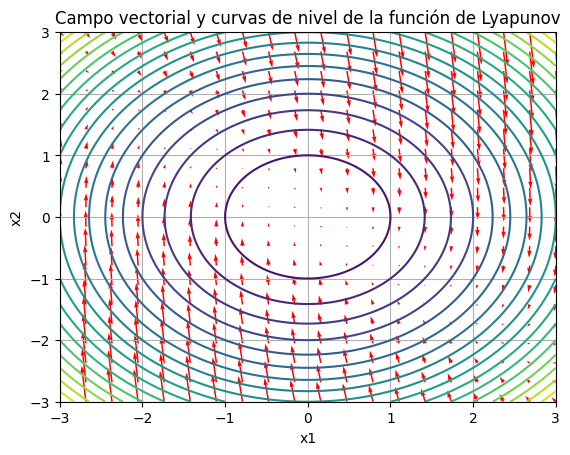

In [9]:
from sympy import symbols, Matrix, Transpose, lambdify
import matplotlib.pyplot as plt

x1, x2 = symbols('x1 x2')
X = Matrix([x1, x2])

V = X.T * P_sym * X

V_func = lambdify((x1, x2), V[0])

x1_vals = np.linspace(-3, 3, 400)
x2_vals = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
V_vals = V_func(X1, X2)

fig, ax = plt.subplots()
ax.contour(X1, X2, V_vals, levels=20, cmap='viridis')

def sistema(x, t):
    return A @ x

x_vals = np.linspace(-3, 3, 20)
y_vals = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U, V = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        vec = sistema(x, 0)
        U[i, j] = vec[0]
        V[i, j] = vec[1]

ax.quiver(X, Y, U, V, color='r')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Campo vectorial y curvas de nivel de la función de Lyapunov')
plt.grid()
plt.show()